# Function Definition

## evaluate_problem

In [1]:
from data_loaders import load_dataset, load_inference_data, promptTechList, modelList, accuracy



def evaluate_problem(problem : str) -> dict[str, dict[str, list[int]]]:

    # formate the problem and its name
    problem_name = problem
    match problem:
        case 'Direct Boolean Computation'|'DirectBooleanComputation':
            from DirectBooleanComputation import response_evaluator
            problem = 'DirectBooleanComputation'
            problem_name = 'Direct Boolean Computation'

        case 'Indirect Boolean Computation'|'IndirectBooleanComputation':
            from IndirectBooleanComputation import response_evaluator
            problem = 'IndirectBooleanComputation'
            problem_name = 'Indirect Boolean Computation'
        
        case 'SAT':
            from SAT import response_evaluator
        
        case 'SAT Count'|'SATCount':
            from SATCount import response_evaluator
            problem = 'SATCount'
            problem_name = 'SAT Count'
        
        case 'TautologyQ':
            from TautologyQ import response_evaluator
        
        case 'EquivalentQ':
            from EquivalentQ import response_evaluator
        
        case 'CNF':
            from CNF import response_evaluator
        
        case 'DNF':
            from DNF import response_evaluator

    # load corresponding dataset
    dataset = load_dataset(problem)

    inference_data = {
        model: {p: load_inference_data(
            problem, p, model) for p in promptTechList}
        for model in modelList
    }
    
    # evaluate all the reponses
    evaluation_result = {
        model : {
            p: [
                response_evaluator(response['response'], dataObject)
                for dataObject, response in zip(dataset, inference_data[model][p])
            ]
        for p in promptTechList}
    for model in modelList
    }

    return evaluation_result

## quick_plot_list

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def quick_plot_result(accuracy_result : dict, problem_name : str, ylim : tuple = (0,1)):
    width = 0.25
    multiplier = 0
    x = np.arange(len(promptTechList))
    fig, ax = plt.subplots(layout='constrained')
    for model in modelList:
        offset = width * multiplier
        rects = ax.bar(x + offset, [round(x,2) for x in accuracy_result[model].values()], width, label = model)
        ax.bar_label(rects, padding = 3);
        multiplier += 1

    ax.set_ylabel('Accuracy')
    ax.set_title(f'Performance on {problem_name} Problem by Different Prompt Techniques')
    ax.set_xticks(x + width, promptTechList)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(ylim)

    plt.show()

In [4]:
import sys
sys.path.append('../')

# Accuracy

### Direct Boolean Computation

In [5]:
evaluation_result = evaluate_problem('DirectBooleanComputation')
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
accuracy_result

{'llama2-13b': {'Zero-shot': 0.1520018778083294,
  'Few-shot': 0.5595533498759305,
  'LtM': 0.15602575279994635,
  'CoT': 0.2070283683186909,
  'Few-shot-CoT': 0.49245523439071825},
 'wizardmath-13b': {'Zero-shot': 0.08423311649118101,
  'Few-shot': 0.4986587083361277,
  'LtM': 0.19234122459928912,
  'CoT': 0.19888002146066663,
  'Few-shot-CoT': 0.4048688887398565}}

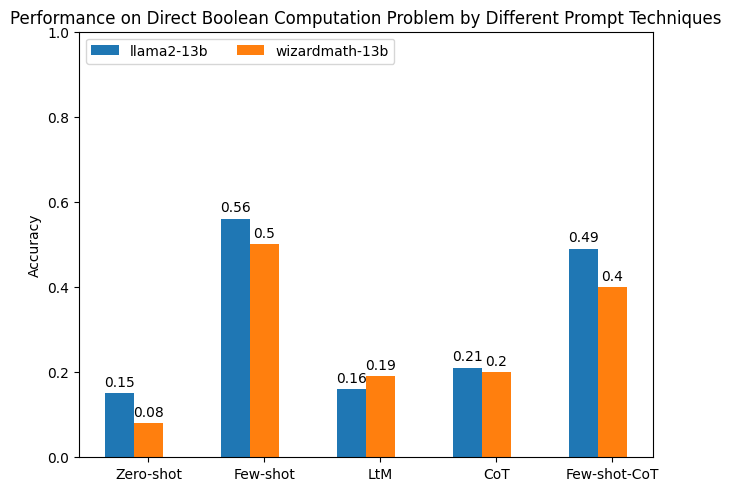

In [6]:
quick_plot_result(accuracy_result,'Direct Boolean Computation')

### Indirect Boolean Computation

In [7]:
evaluation_result = evaluate_problem('IndirectBooleanComputation')
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
accuracy_result

{'llama2-13b': {'Zero-shot': 0.08919597989949749,
  'Few-shot': 0.5264178033022254,
  'LtM': 0.17433596554199568,
  'CoT': 0.21974156496769562,
  'Few-shot-CoT': 0.4277099784637473},
 'wizardmath-13b': {'Zero-shot': 0.01870064608758076,
  'Few-shot': 0.17641780330222542,
  'LtM': 0.06575735821966978,
  'CoT': 0.0624551328068916,
  'Few-shot-CoT': 0.23334529791816225}}

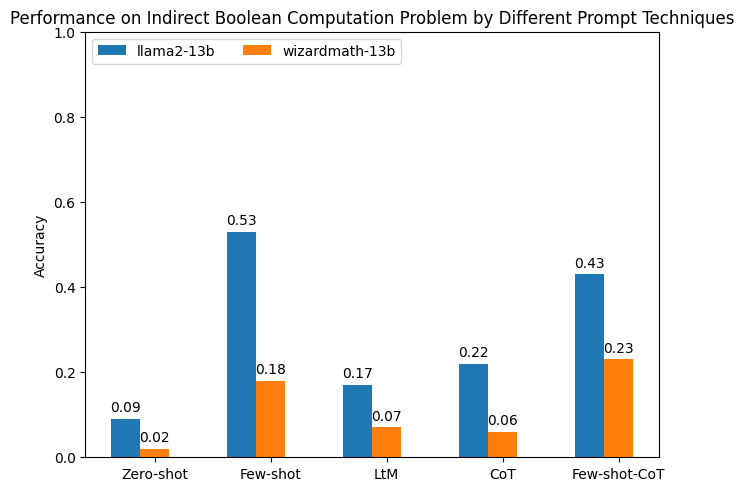

In [8]:
quick_plot_result(accuracy_result,'Indirect Boolean Computation')

### SAT

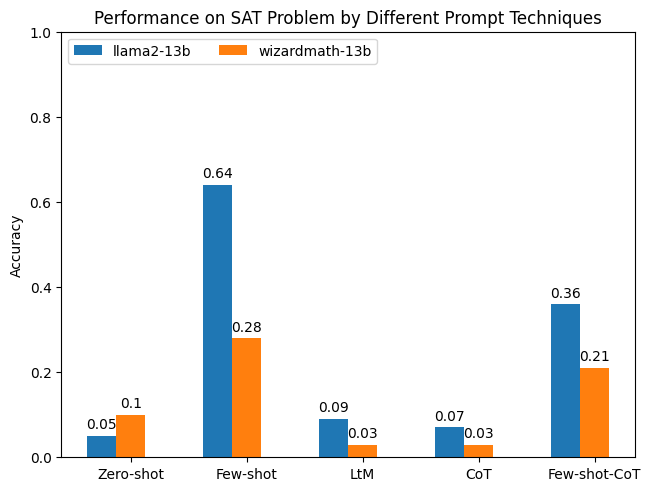

In [9]:
problem = 'SAT'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)

### CNF

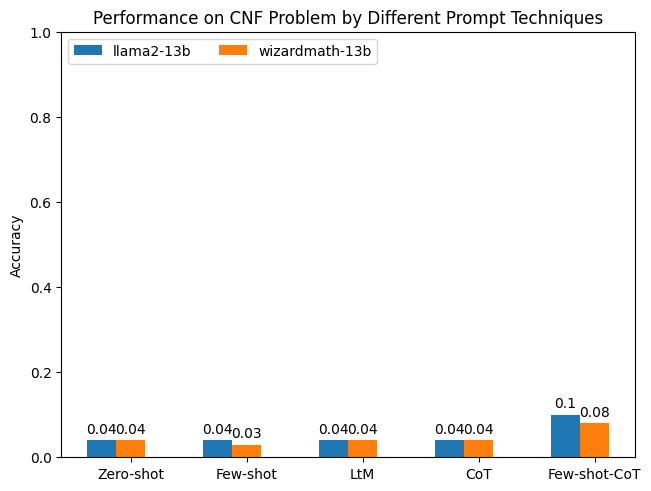

In [18]:
problem = 'CNF'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)

### DNF

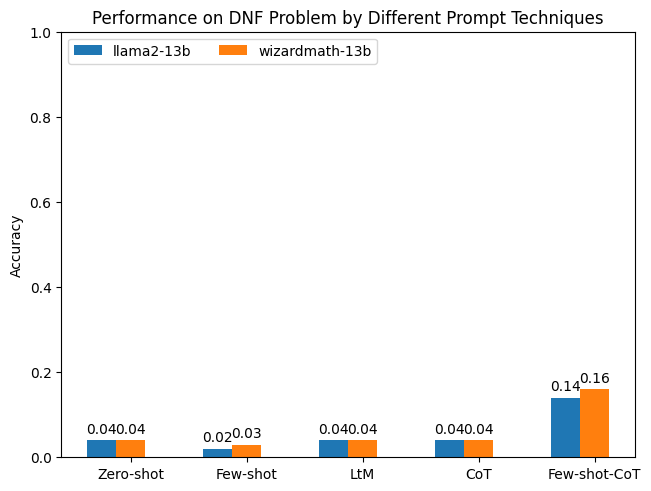

In [19]:
problem = 'DNF'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)

### EquivalentQ

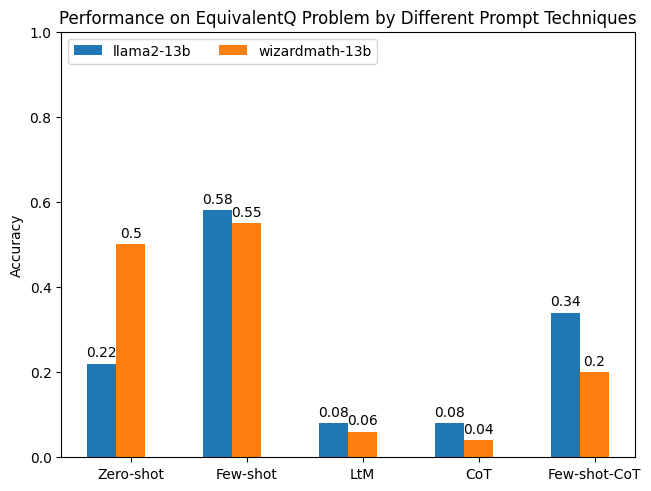

In [21]:
problem = 'EquivalentQ'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)

### TautologyQ

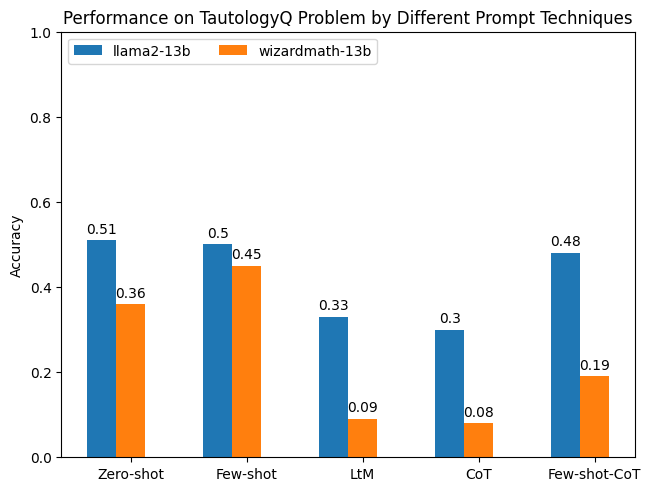

In [22]:
problem = 'TautologyQ'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)

### SAT Count

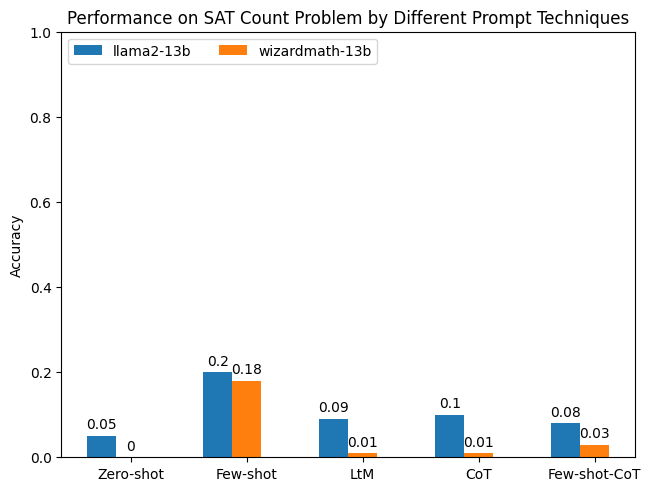

In [23]:
problem = 'SAT Count'
evaluation_result = evaluate_problem(problem)
accuracy_result = {model : {p: accuracy(evaluation_result[model][p]) for p in promptTechList} for model in modelList}
quick_plot_result(accuracy_result, problem)